## Custom Holidays

In [2]:
# Install libraries
!pip install yfinance prophet -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.8 MB/s eta 0:00:00


In [3]:
# Get time series data
import yfinance as yf
from prophet import Prophet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
start_date = '2020-01-02'
end_date = '2022-01-01' 

train_end_date = '2021-12-15'

In [5]:
ticker_list = ['GOOG', 'VTI']
data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]
data.columns = data.columns.droplevel(0)
data

[*********************100%***********************]  2 of 2 completed


,GOOG,VTI
Date,,
2020-01-02,68.368500,164.979996
2020-01-03,68.032997,163.929993
2020-01-06,69.710503,164.490005
2020-01-07,69.667000,164.100006
2020-01-08,70.216003,164.910004
...,...,...
2021-12-27,148.063995,242.960007
2021-12-28,146.447998,242.460007
2021-12-29,146.504501,242.600006


In [6]:
# Information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    505 non-null    float64
 1   VTI     505 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


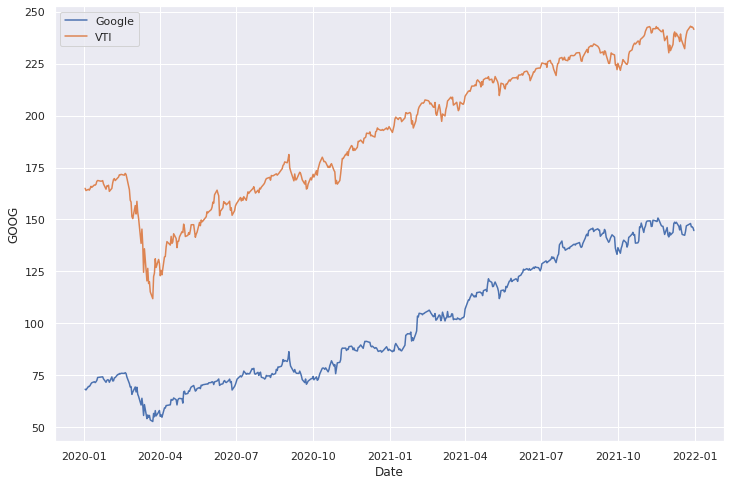

In [7]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.index, y=data['GOOG'])
sns.lineplot(x=data.index, y=data['VTI'])
plt.legend(['Google', 'VTI'])

Step 3 transforms the dataset into a time series modeling dataset.

Prophet requires at least two columns as inputs: a ds column and a y column.

- The ds column has the time information. Currently we have the date as the index, so we reset the index and rename date to ds.
- The y column has the time series values. In this example, because we are predicting the Google closing price, the column name GOOG is changed to y.
- There is no pre-defined name for the additional predictor in prophet, so we can keep the name VTI as is.


In [8]:
# Change variable names
data = data.reset_index()
data.columns = ['ds', 'y', 'VTI']
# Take a look at the data
data.head()

,ds,y,VTI
0,2020-01-02,68.368500,164.979996
1,2020-01-03,68.032997,163.929993
2,2020-01-06,69.710503,164.490005
3,2020-01-07,69.667000,164.100006
4,2020-01-08,70.216003,164.910004


In [9]:
# Check correlation
data.corrwith(data["y"])

y      1.000000
VTI    0.967116
dtype: float64

In [10]:
# Train test split
train = data[data['ds'] <= train_end_date]
test = data[data['ds'] > train_end_date]
# Check the shape of the dataset
print(train.shape)
print(test.shape)

(494, 3)
(11, 3)


In [11]:
# Check the start and end time of the training and testing dataset
print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())

The start time of the training dataset is  2020-01-02 00:00:00
The end time of the training dataset is  2021-12-15 00:00:00
The start time of the testing dataset is  2021-12-16 00:00:00
The end time of the testing dataset is  2021-12-31 00:00:00


In [12]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/1zqo9ncv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/nekobui9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83149', 'data', 'file=/tmp/tmpzg11kzhz/1zqo9ncv.json', 'init=/tmp/tmpzg11kzhz/nekobui9.json', 'output', 'file=/tmp/tmpzg11kzhz/prophet_model_4atqzgx/prophet_model-20230221185532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


The model information shows that the yearly seasonality and the daily seasonality are disabled.

- The daily seasonality is disabled because we do not have sub-daily time series.
- The yearly seasonality is disabled because we do not have two full years of data in the training dataset.

If you remember that the testing dataset has 11 data points, you might wonder why we put 16 instead of 11 as the number of periods here. 

That is because there are 5 weekends and holidays from December 16th to December 31st in 2021. 

We need to add those days back in order to get the predictions till December 31st of 2021.

In [14]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=16)
future_baseline

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
...,...
505,2021-12-27
506,2021-12-28
507,2021-12-29
508,2021-12-30


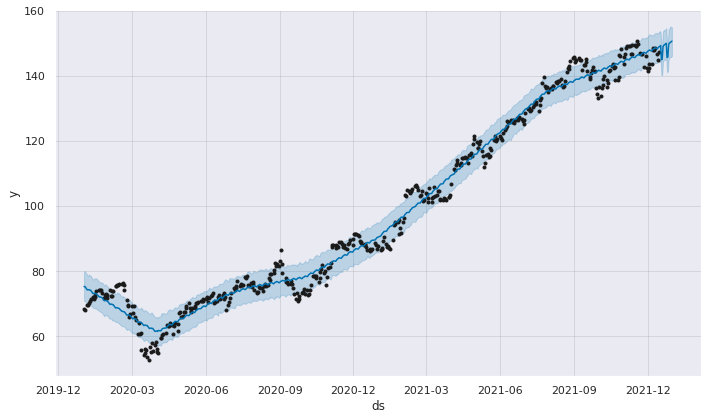

In [15]:
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

- The black dots are the actual values.
- The blue line is the prediction.
- The blue shades are the uncertainty interval. The default value for the uncertainty interval is 80%, so we are using 80% here. The uncertainty interval is calculated based on the assumption that the average frequency and magnitude of trend changes in the future will be the same as the historical data. The historical data trend changes are projected forward to get the uncertainty intervals [1].

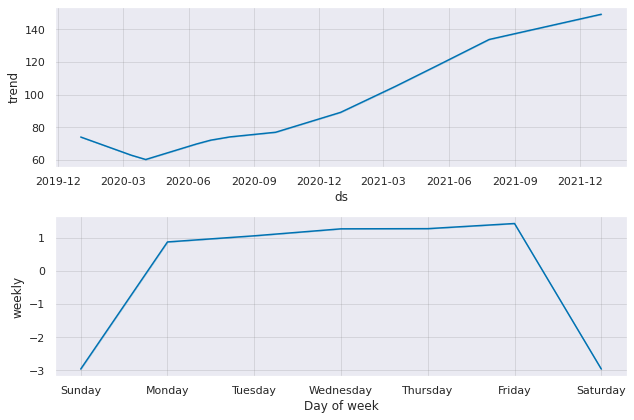

In [16]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);


The forecast dataframe does not include the actual values, so we need to merge the forecast dataframe with the test dataframe to compare the actual values with the predicted values.



In [17]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 4.32105793385232
The MAPE for the baseline model is 0.029833633137538215


he mean absolute percent error (MAPE) for the baseline model is 2.9%, meaning that on average, the forecast is off by 2.9% of the stock price.

## MULTIVARIATE: Add Seasonality To Baseline Model
The baseline model already gives us good estimations. Can we tune the model to make the estimations better? In step 6, we will force the model to consider the yearly seasonality.

When initiating the prophet model, the yearly_seasonality and weekly_seasonality are explicitly set to True, and then fit on the training data.

In [18]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True,
                       weekly_seasonality=True
                       )
# Fit the model on the training dataset
model_season.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/fghkof90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/tsby413e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63198', 'data', 'file=/tmp/tmpzg11kzhz/fghkof90.json', 'init=/tmp/tmpzg11kzhz/tsby413e.json', 'output', 'file=/tmp/tmpzg11kzhz/prophet_model3wdnaxi7/prophet_model-20230221185830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:58:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


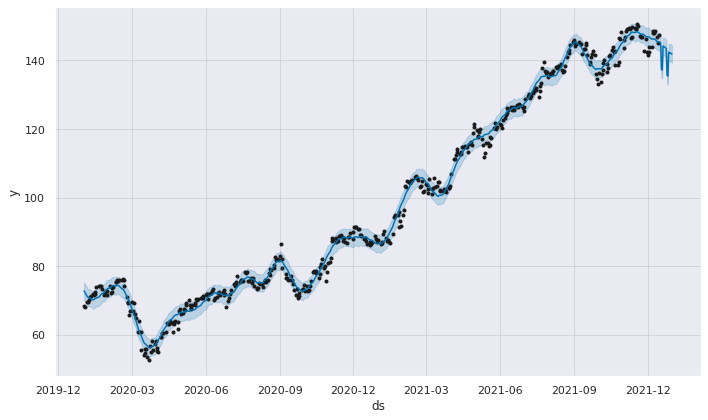

In [19]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=16)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

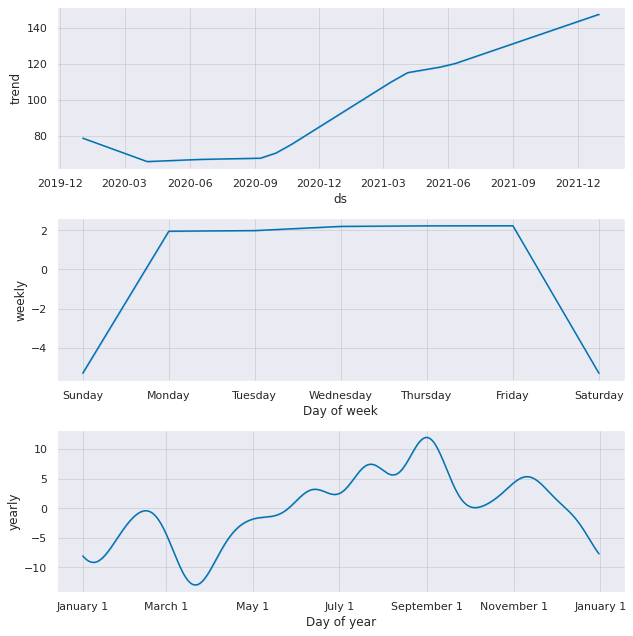

In [20]:
# Visualize the forecast components
model_season.plot_components(forecast_season);


In [21]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 2.9286680042802633
The MAPE for the seasonality model is 0.02004566004654092


## Step 7: Multivariate Model
In step 7, we added the VTI price as an additional predictor using the add_regressor function. standardize=False means the regressor will not be standardized.

VTI is chosen as a convenient example of illustrating the process of building a multivariate model. In practice, multiple features need to be created and evaluated as feature engineering and feature selection steps for the model.

In [22]:
# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True, 
                             weekly_seasonality=True
                             )

# Add regressor
model_multivariate.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/5kgmn5y9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/tyxv3hxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32470', 'data', 'file=/tmp/tmpzg11kzhz/5kgmn5y9.json', 'init=/tmp/tmpzg11kzhz/tyxv3hxq.json', 'output', 'file=/tmp/tmpzg11kzhz/prophet_modelixjttg09/prophet_model-20230221185940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:59:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


When making forecasts for the multivariate model, we need to make sure that the regressors have values for the forecast periods, so we used left join and appended VTI data to the future dataframe.

In the case that the forecast is for the future without the regressor data, separate models need to be built for the regressors to get the predictions for the future dates.

If there are missing values, we can use .fillna(method='ffill') to fill the missing value with the previous day’s data.

In [23]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=16)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,VTI
495,2021-12-17,235.440002
496,2021-12-20,232.130005
497,2021-12-21,236.679993
498,2021-12-22,239.020004
499,2021-12-23,240.669998
500,2021-12-27,242.960007
501,2021-12-28,242.460007
502,2021-12-29,242.600006
503,2021-12-30,242.210007
504,2021-12-31,241.440002


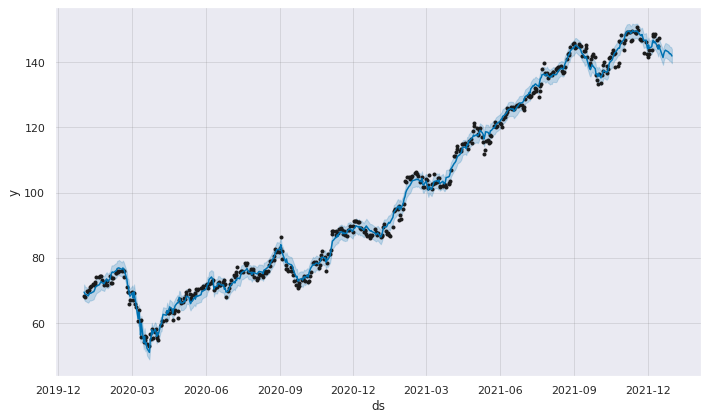

In [24]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

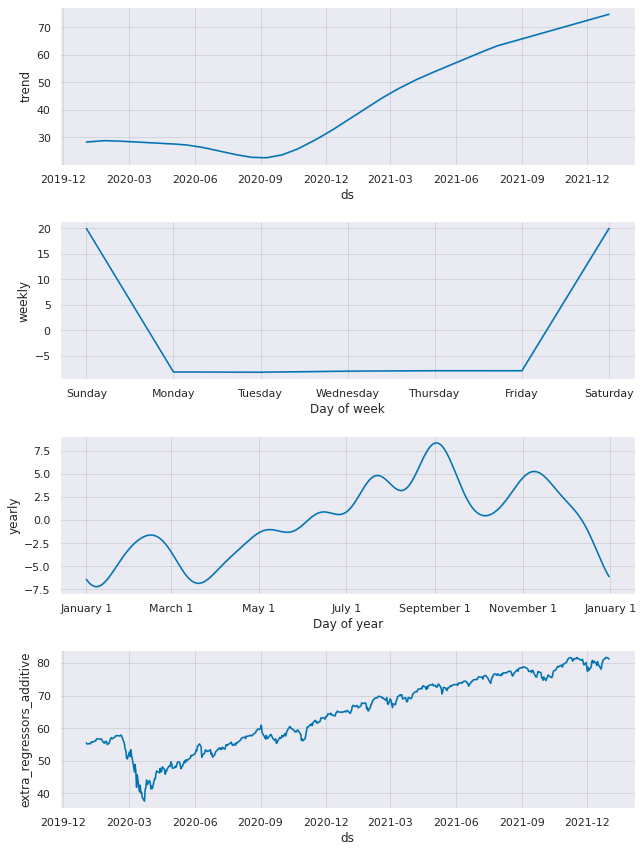

In [25]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [26]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 2.7431491363450315
The MAPE for the multivariate model is 0.018755921982616042


## Step 8: Model With Holiday Effect And Event Effect
Besides seasonalities and additional predictors, we can also incorporate holidays and special events in a prophet time series model. In step 8, we will add special events and US holidays to the multivariate model and see how it impacts the model predictions.

Firstly, let’s create two special events: COVID start and Super Bowl.
- For the COVID start event, we set the date to be March 15th of 2020, then extend the event to 15 days before and 15 days after using lower_window and upper_window separately.
- For the Super Bowl event, we set the date in 2020 and 2021 separately, and extend the event to 7 days before and 1 day after.

In [27]:
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,    
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,    
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


In [28]:
# Add holidays
model_holiday = Prophet(yearly_seasonality=True, 
                        weekly_seasonality=True, 
                        holidays=events
                        )

# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')

# Add regressor
model_holiday.add_regressor('VTI', standardize=False)

# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/dx8b_y_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzg11kzhz/lqcelebx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72975', 'data', 'file=/tmp/tmpzg11kzhz/dx8b_y_3.json', 'init=/tmp/tmpzg11kzhz/lqcelebx.json', 'output', 'file=/tmp/tmpzg11kzhz/prophet_model6kmy8yqy/prophet_model-20230221190425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0                                               COVID
1                                           superbowl
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                         Independence Day (Observed)
8                                           Labor Day
9                                        Columbus Day
10                                       Veterans Day
11                                       Thanksgiving
12                                      Christmas Day
13                          New Year's Day (Observed)
14               Juneteenth National Independence Day
15    Juneteenth National Independence Day (Observed)
16                           Christmas Day (Observed)
dtype: object

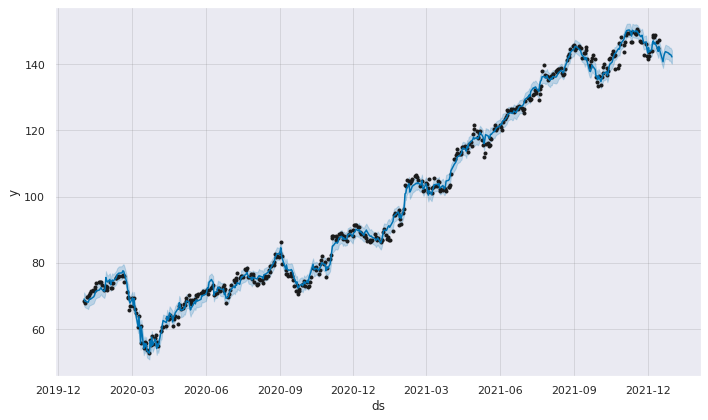

In [29]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=16)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

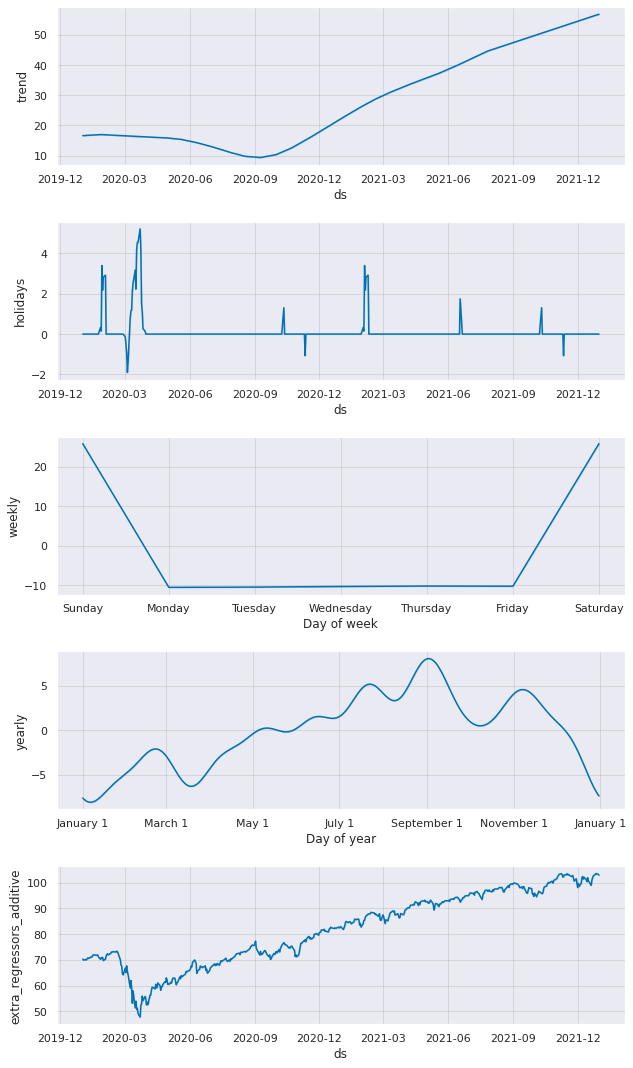

In [30]:
# Visualize the forecast components
model_holiday.plot_components(forecast_holiday);

In [31]:
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 2.698036021014161
The MAPE for the holiday/event model is 0.018458308563573028


In [38]:
model_holiday = Prophet(yearly_seasonality=True, 
                        weekly_seasonality=True, 
                        #holidays=events
                        )

# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='JP')

# Add regressor
model_holiday.add_regressor('VTI', standardize=False)

# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

TypeError: ignored